<a href="https://colab.research.google.com/github/dhirajdeore3/dhirajdeore3/blob/main/WINEQUALITYPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WINE QUALITY PREDICTION**

:- **DHIRAJ DEORE**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
dataset = pd.read_csv('Final Project 1.csv')

In [ ]:

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print(dataset.shape)

(1599, 12)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
dup_df = dataset[dataset.duplicated()]
print("No. of duplicate rows- ", dup_df.shape )

No. of duplicate rows-  (240, 12)


In [ ]:
dataset = dataset.drop_duplicates()
print(dataset.shape)

(1359, 12)


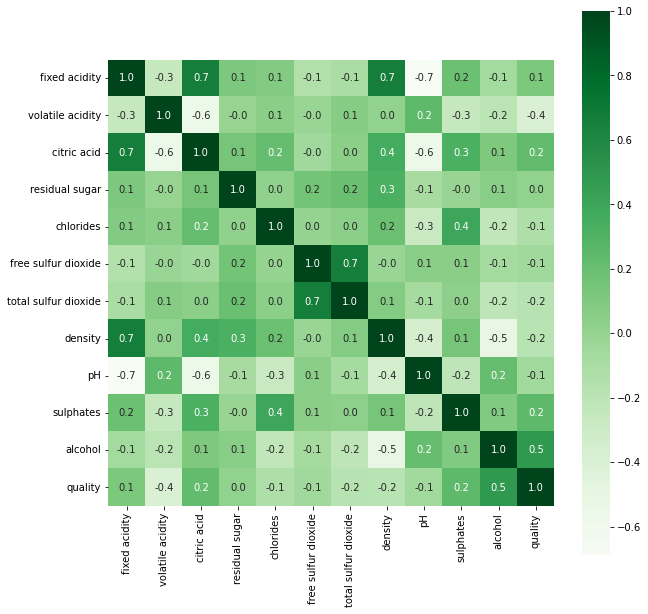

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws = {'size':10}, cmap='Greens')

In [ ]:
print(dataset['quality'].value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


In [ ]:
def mark(x):
    if x < 7:
        return 'Bad'
    else:
        return 'Good'
dataset['quality']=dataset['quality'].apply(lambda x: mark(x))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


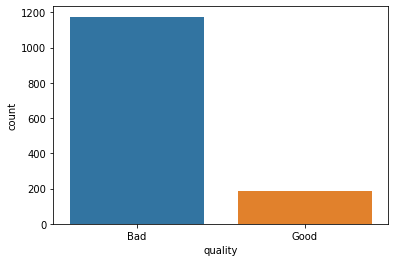

In [ ]:
sns.countplot(dataset['quality'])

In [ ]:
Product_quality = LabelEncoder()
dataset['quality'] = Product_quality.fit_transform(dataset['quality'])
print(dataset['quality'].value_counts())

0    1175
1     184
Name: quality, dtype: int64


In [ ]:
x = dataset.drop(['quality'], axis=1)
y = dataset['quality']

sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=52)
print(x_train.shape, x_test.shape)

(1046, 11) (313, 11)


In [ ]:
def predict(mod1):
    mod = mod1
    mod.fit(x_train, y_train)
    y_pd=mod.predict(x_test)
    print("Accuracy score: ",(accuracy_score(y_test, y_pd)*100))
    print("\nConfusion Matirx")
    print(confusion_matrix(y_test, y_pd))
    print("\nClassification report")
    print(classification_report(y_test,y_pd))

In [ ]:
from sklearn.linear_model import LogisticRegression
predict(LogisticRegression())

Accuracy score:  85.62300319488818

Confusion Matirx
[[257   6]
 [ 39  11]]

Classification report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       263
           1       0.65      0.22      0.33        50

    accuracy                           0.86       313
   macro avg       0.76      0.60      0.62       313
weighted avg       0.83      0.86      0.83       313



In [ ]:
from sklearn.tree import DecisionTreeClassifier
predict(DecisionTreeClassifier(max_depth=2))



Accuracy score:  87.22044728434504

Confusion Matirx
[[252  11]
 [ 29  21]]

Classification report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       263
           1       0.66      0.42      0.51        50

    accuracy                           0.87       313
   macro avg       0.78      0.69      0.72       313
weighted avg       0.86      0.87      0.86       313



In [ ]:
from sklearn.ensemble import RandomForestClassifier
predict(RandomForestClassifier(n_estimators=200, random_state=0))

Accuracy score:  87.53993610223642

Confusion Matirx
[[261   2]
 [ 37  13]]

Classification report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       263
           1       0.87      0.26      0.40        50

    accuracy                           0.88       313
   macro avg       0.87      0.63      0.67       313
weighted avg       0.87      0.88      0.85       313



In [ ]:
from sklearn.svm import SVC
predict(SVC())

Accuracy score:  86.26198083067092

Confusion Matirx
[[260   3]
 [ 40  10]]

Classification report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       263
           1       0.77      0.20      0.32        50

    accuracy                           0.86       313
   macro avg       0.82      0.59      0.62       313
weighted avg       0.85      0.86      0.83       313



In [ ]:
model = SVC()                                            
model.fit(x_train, y_train)

test_case_list = [8.99, 9.57, 0.458, 2.568, 2.145, 25, 12.45, 1.1254, 3.14, 7.25, 12.5478]

test_case_df = pd.DataFrame(test_case_list)              
test_case = test_case_df.T                                
test_case_scaled = sc.transform(test_case)                
test_case_prediction = model.predict(test_case_scaled)   
if(test_case_prediction == 0):                           
    print('Good Quality Wine')
else:
    print('Not Good Quality Wine')

Good Quality Wine
